<a href="https://colab.research.google.com/github/tarun7explorer/ML_Projects/blob/main/Titanic_survival_using_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tflearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=fc160c801b616867f1edd625a170713dc52451cd50324e6121b35b6a8306c4bb
  Stored in directory: /root/.cache/pip/wheels/67/dd/7b/ddc1488c900739f410ea276e0e450d220f69d85c39e421f5f3
Successfully built tflearn


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [15]:


df = pd.read_csv("/titanic.zip")


In [16]:
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [19]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
#optimizing data
# splitting data into training & testing

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (334, 11)
Shape of X_test: (84, 11)
Shape of y_train: (334,)
Shape of y_test: (84,)


In [55]:
# Fill missing values in age,fare
mean_age = X_train['Age'].mean()
X_train['Age'].fillna(mean_age, inplace=True)
X_test['Age'].fillna(mean_age, inplace=True)

mean_fare = X_train['Fare'].mean()
X_train['Fare'].fillna(mean_fare, inplace=True)
X_test['Fare'].fillna(mean_fare, inplace=True)

print("Missing values in X_train after filling:")
print(X_train[['Age', 'Fare']].isnull().sum())

Missing values in X_train after filling:
Age     0
Fare    0
dtype: int64


In [56]:
# converting cathegorial variable sex into numeric
#malle =0 female=1
if X_train['Sex'].dtype == 'object':
    X_train['Sex'] = X_train['Sex'].apply(lambda x: 1 if x == 'female' else 0)
if X_test['Sex'].dtype == 'object':
    X_test['Sex'] = X_test['Sex'].apply(lambda x: 1 if x == 'female' else 0)


In [21]:
#data visualization - understanding survival trends

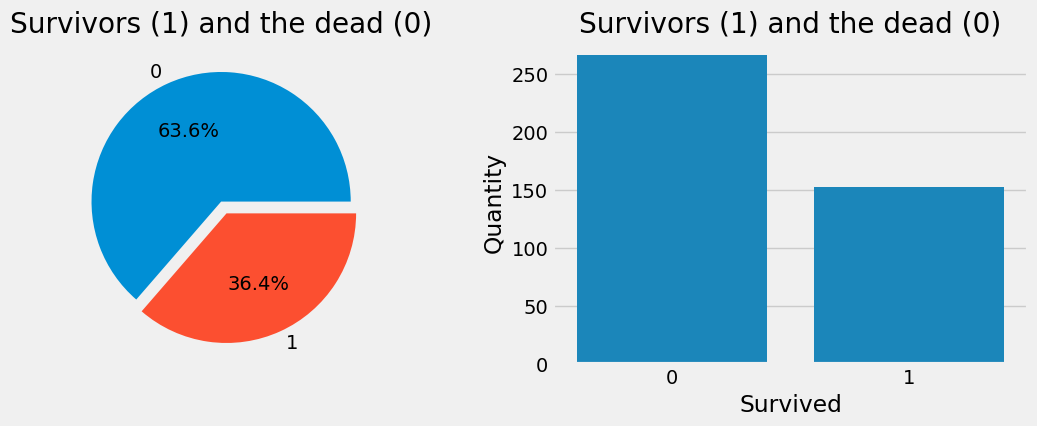

In [27]:
# number of survivors & death count
f, ax = plt.subplots(1, 2, figsize=(12, 4))
df['Survived'].value_counts().plot.pie(
        explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the dead (0)')
plt.show()

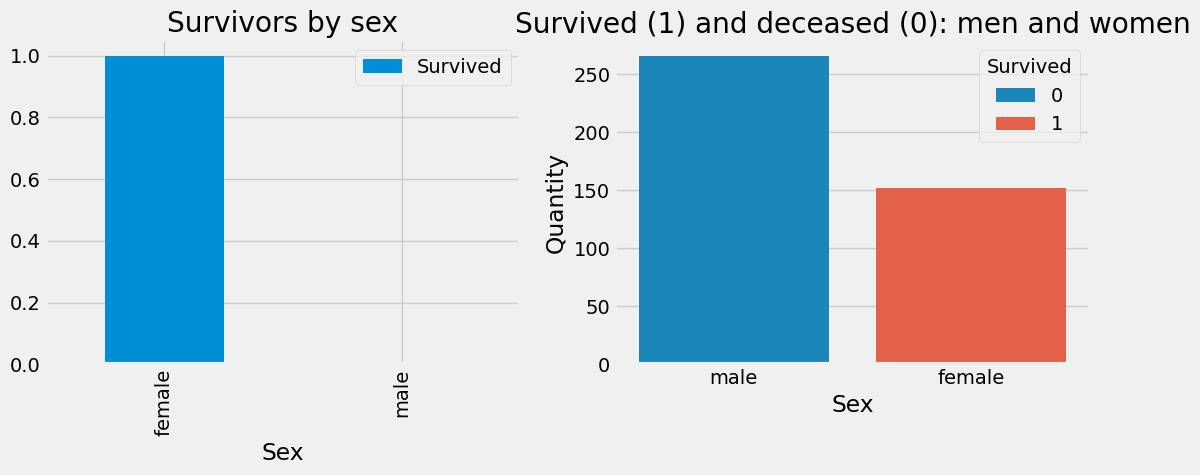

In [28]:
# survival rates based on the gender
f, ax = plt.subplots(1, 2, figsize=(12, 4))
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and deceased (0): men and women')
plt.show()


In [49]:
#model traing

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Drop potentially remaining non-numeric and irrelevant columns
irrelevant_columns_to_drop = ['Name', 'Ticket', 'Cabin']
X_train = X_train.drop(columns=irrelevant_columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=irrelevant_columns_to_drop, errors='ignore')

randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [58]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set using the trained model
y_pred = randomforest.predict(X_test)

# Find the accuracy score of the model
acc_randomforest = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Accuracy of the Random Forest model: {acc_randomforest}%")

Accuracy of the Random Forest model: 100.0%


In [62]:
# Get the PassengerIds from the original df using the index of X_test
ids = df.loc[X_test.index, 'PassengerId']
predictions = randomforest.predict(X_test)


output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
display(output)

,PassengerId,Survived
321,1213,0
324,1216,1
388,1280,0
56,948,0
153,1045,1
...,...,...
57,949,0
126,1018,0
24,916,1
17,909,0


from matplotlib import pyplot as plt
output['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
output['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
output.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
output['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
output['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)